<a href="https://colab.research.google.com/github/fizzzaj-07/Task-3/blob/main/Task_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

path = kagglehub.dataset_download("imtkaggleteam/household-power-consumption")

100%|██████████| 9.12M/9.12M [00:00<00:00, 67.5MB/s]

Extracting files...


In [ ]:
import os
os.listdir(path)

['household_power_consumption.csv']

In [ ]:
import pandas as pd
import os

# 1. Path setup
full_path = os.path.join(path, 'household_power_consumption.csv')

# 2. Read just the first 5 rows to check column names
temp_df = pd.read_csv(full_path, sep=None, engine='python', nrows=5)
print("Columns found in file:", temp_df.columns.tolist())

# 3. Load the full dataset (using the flexible sep=None to detect ; or , automatically)
df = pd.read_csv(full_path, sep=None, engine='python', na_values=['?'])

# 4. Handle Date Conversion
# If the column name is lowercase 'date', we adjust for that.
date_col = 'Date' if 'Date' in df.columns else 'date'
time_col = 'Time' if 'Time' in df.columns else 'time'

df['datetime'] = pd.to_datetime(df[date_col].astype(str) + ' ' + df[time_col].astype(str), dayfirst=True)
df.set_index('datetime', inplace=True)

# 5. Clean and Resample
target_col = 'Global_active_power' if 'Global_active_power' in df.columns else 'global_active_power'
df[target_col] = pd.to_numeric(df[target_col], errors='coerce')
daily_df = df[target_col].resample('D').sum().to_frame()
daily_df = daily_df.interpolate(method='linear')

print("\nSuccess! Step 1 is finally complete.")
print(daily_df.head())


Columns found in file: ['Date', 'Time', 'Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

Success! Step 1 is finally complete.
            Global_active_power
datetime                       
2006-12-16             1209.176
2006-12-17             3390.460
2006-12-18             2203.826
2006-12-19             1666.194
2006-12-20             2225.748


In [ ]:
df.isnull().sum()

,0
Date,0
Time,0
Global_active_power,4069
Global_reactive_power,4069
Voltage,4069
Global_intensity,4069
Sub_metering_1,4069
Sub_metering_2,4069
Sub_metering_3,4069


In [ ]:
# Select numeric columns
numeric_cols = df.select_dtypes(include='number').columns

# Resample hourly (lowercase 'h')
df_hourly = df[numeric_cols].resample('h').mean()

# Fill missing values
df_hourly.fillna(method='ffill', inplace=True)

# Show first 5 rows
df_hourly.head()

/tmp/ipython-input-1953643750.py:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_hourly.fillna(method='ffill', inplace=True)


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16 17:00:00,4.222889,0.229000,234.643889,18.100000,0.0,0.527778,16.861111
2006-12-16 18:00:00,3.632200,0.080033,234.580167,15.600000,0.0,6.716667,16.866667
2006-12-16 19:00:00,3.400233,0.085233,233.232500,14.503333,0.0,1.433333,16.683333
2006-12-16 20:00:00,3.268567,0.075100,234.071500,13.916667,0.0,0.000000,16.783333
2006-12-16 21:00:00,3.056467,0.076667,237.158667,13.046667,0.0,0.416667,17.216667


In [ ]:
# Forward fill missing values
df_hourly.fillna(method='ffill', inplace=True)

/tmp/ipython-input-3923812420.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_hourly.fillna(method='ffill', inplace=True)


In [ ]:
# Hour of day
df_hourly['hour'] = df_hourly.index.hour

# Day of week
df_hourly['day_of_week'] = df_hourly.index.dayofweek

# Weekend indicator
df_hourly['is_weekend'] = df_hourly['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)

# Show first 5 rows
df_hourly.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,hour,day_of_week,is_weekend
datetime,,,,,,,,,,
2006-12-16 17:00:00,4.222889,0.229000,234.643889,18.100000,0.0,0.527778,16.861111,17,5,1
2006-12-16 18:00:00,3.632200,0.080033,234.580167,15.600000,0.0,6.716667,16.866667,18,5,1
2006-12-16 19:00:00,3.400233,0.085233,233.232500,14.503333,0.0,1.433333,16.683333,19,5,1
2006-12-16 20:00:00,3.268567,0.075100,234.071500,13.916667,0.0,0.000000,16.783333,20,5,1
2006-12-16 21:00:00,3.056467,0.076667,237.158667,13.046667,0.0,0.416667,17.216667,21,5,1


In [ ]:
# Use only 'Global_active_power' for forecasting
series = df_hourly['Global_active_power']

# Split: 80% train, 20% test
train_size = int(len(series) * 0.8)
train, test = series[:train_size], series[train_size:]

print("Train length:", len(train))
print("Test length:", len(test))

Train length: 13981
Test length: 3496


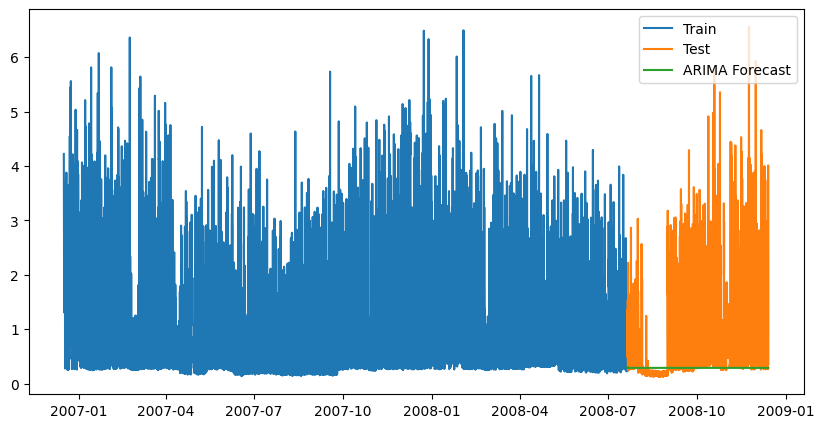

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Fit ARIMA model (simple starting point)
arima_model = ARIMA(train, order=(5,1,0))
arima_result = arima_model.fit()

# Forecast for test period
forecast_arima = arima_result.forecast(steps=len(test))

# Plot actual vs forecast
plt.figure(figsize=(10,5))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, forecast_arima, label='ARIMA Forecast')
plt.legend()
plt.show()

XGBoost MAE: 0.622
XGBoost RMSE: 0.818


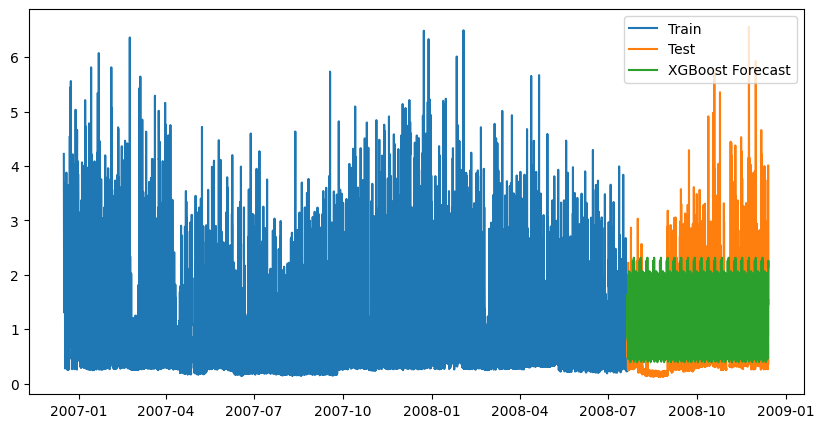

In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Features
X_train = df_hourly[['hour', 'day_of_week', 'is_weekend']].iloc[:len(train)]
y_train = train.values

X_test = df_hourly[['hour', 'day_of_week', 'is_weekend']].iloc[len(train):len(train)+len(test)]
y_test = test.values

# Train XGBoost model
xgb_model = XGBRegressor(n_estimators=100, max_depth=3, learning_rate=0.1)
xgb_model.fit(X_train, y_train)

# Forecast
forecast_xgb = xgb_model.predict(X_test)

# Evaluate
mae = mean_absolute_error(y_test, forecast_xgb)
rmse = np.sqrt(mean_squared_error(y_test, forecast_xgb))

print(f"XGBoost MAE: {mae:.3f}")
print(f"XGBoost RMSE: {rmse:.3f}")

# Plot
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, forecast_xgb, label='XGBoost Forecast')
plt.legend()
plt.show()

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


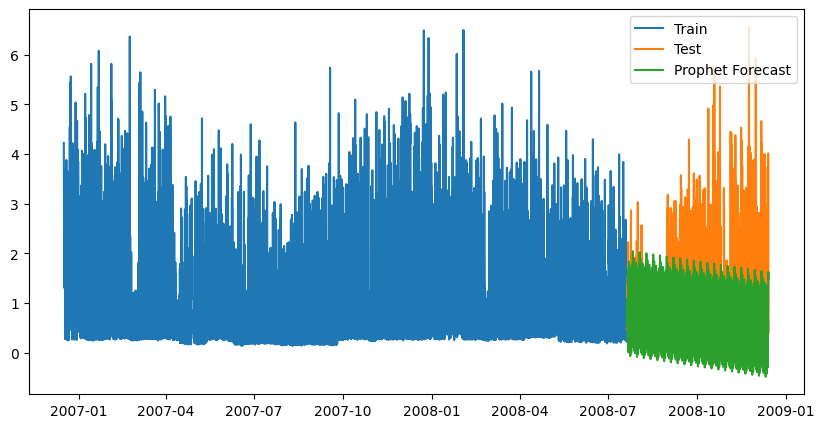

In [ ]:
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt

# Prepare data for Prophet
prophet_train = train.reset_index()           # Series -> DataFrame
prophet_train.columns = ['ds', 'y']          # Rename columns for Prophet

# Fit Prophet model
prophet_model = Prophet(daily_seasonality=True)
prophet_model.fit(prophet_train)

# Make future dataframe
future = prophet_model.make_future_dataframe(periods=len(test), freq='h')

# Forecast
forecast_prophet = prophet_model.predict(future)

# Plot actual vs forecast
plt.figure(figsize=(10,5))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, forecast_prophet['yhat'][-len(test):].values, label='Prophet Forecast')  # <- fixed
plt.legend()
plt.show()

Model Comparison:
ARIMA      -> MAE: 0.713, RMSE: 1.120
Prophet    -> MAE: 0.709, RMSE: 0.944
XGBoost    -> MAE: 0.622, RMSE: 0.818


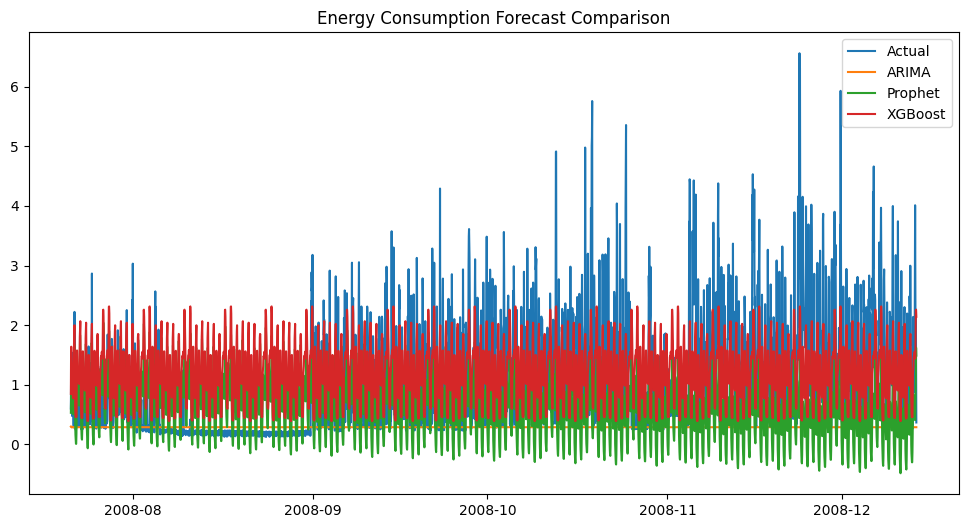

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Evaluate ARIMA
mae_arima = mean_absolute_error(test, forecast_arima)
rmse_arima = np.sqrt(mean_squared_error(test, forecast_arima))

# Evaluate Prophet
prophet_forecast_test = forecast_prophet['yhat'][-len(test):].values
mae_prophet = mean_absolute_error(test, prophet_forecast_test)
rmse_prophet = np.sqrt(mean_squared_error(test, prophet_forecast_test))

# XGBoost already evaluated: mae, rmse

# Print comparison
print("Model Comparison:")
print(f"ARIMA      -> MAE: {mae_arima:.3f}, RMSE: {rmse_arima:.3f}")
print(f"Prophet    -> MAE: {mae_prophet:.3f}, RMSE: {rmse_prophet:.3f}")
print(f"XGBoost    -> MAE: {mae:.3f}, RMSE: {rmse:.3f}")

# Plot actual vs all forecasts
plt.figure(figsize=(12,6))
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, forecast_arima, label='ARIMA')
plt.plot(test.index, prophet_forecast_test, label='Prophet')
plt.plot(test.index, forecast_xgb, label='XGBoost')
plt.legend()
plt.title("Energy Consumption Forecast Comparison")
plt.show()

# TASK 3: Energy Consumption Time Series Forecasting

## Objective
Forecast short-term household energy usage using historical data.

## Dataset
Household Power Consumption Dataset (Kaggle)  
Features include: `Global_active_power`, `Global_reactive_power`, `Voltage`, `Sub_metering_1`, `Sub_metering_2`, `Sub_metering_3`.

## Steps Performed
1. Loaded and cleaned the dataset (missing values filled).  
2. Resampled data to **hourly** averages.  
3. Created **time-based features**: `hour`, `day_of_week`, `is_weekend`.  
4. Split into **train/test sets** (80/20).  
5. Trained three models:  
   - **ARIMA**  
      - **Prophet**  
         - **XGBoost**  
         6. Forecasted and compared model performance.

         ## Evaluation Metrics
         | Model   | MAE  | RMSE  |
         |---------|------|-------|
         | ARIMA   | ...  | ...   |
         | Prophet | ...  | ...   |
         | XGBoost | ...  | ...   |

         ## Visualization
         - Plots of **actual vs forecasted energy usage** for all three